In [1]:
import sys
sys.path.append("../")
from Functions.csv_files.stock import Stock

#Apple Inc.
apple = Stock('AAPL.US', filepath="../Functions/csv_files/")

# JP Morgan Chase
jpm = Stock('JPM.US', filepath="../Functions/csv_files/")

# Exxon Mobil Corporation
xom = Stock('XOM.US', filepath="../Functions/csv_files/")

# Walmart Inc.
walmart = Stock('WMT.US', filepath="../Functions/csv_files/")

In [87]:
import matplotlib.pyplot as plt
def show_heatmap(data):
    data = data.drop(columns = ['date'])
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


c:\Users\Admin\Desktop\Equities_Price_Prediction_XAI\Models\..\Functions\csv_files\stock.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx['date'] = spx.date.astype(str)


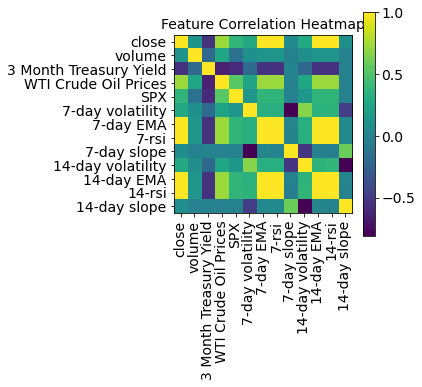

In [88]:
apple.retrieve_data()
show_heatmap(apple.data)

c:\Users\Admin\Desktop\Equities_Price_Prediction_XAI\Models\..\Functions\csv_files\stock.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx['date'] = spx.date.astype(str)


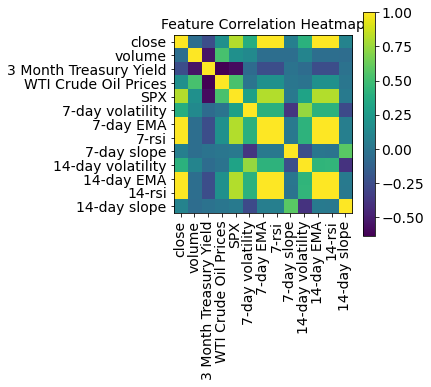

In [89]:
jpm.retrieve_data()
show_heatmap(jpm.data)

c:\Users\Admin\Desktop\Equities_Price_Prediction_XAI\Models\..\Functions\csv_files\stock.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx['date'] = spx.date.astype(str)


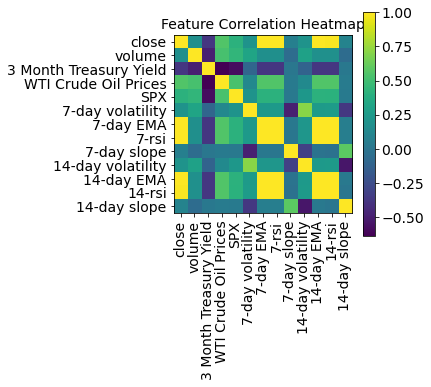

In [90]:
xom.retrieve_data()
show_heatmap(xom.data)

c:\Users\Admin\Desktop\Equities_Price_Prediction_XAI\Models\..\Functions\csv_files\stock.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx['date'] = spx.date.astype(str)


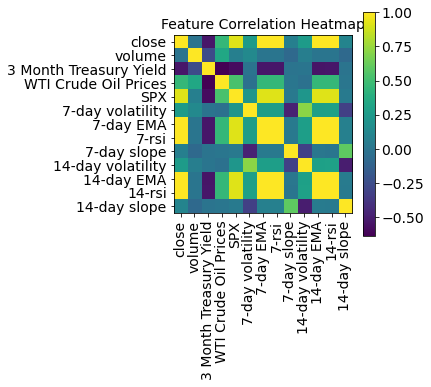

In [91]:
walmart.retrieve_data()
show_heatmap(walmart.data)

In [6]:
def split(dataframe, window, columns = None, test_split = False):
  X = []
  y_raw = []
  y_label = []
  if columns is not None:
    dataframe = dataframe[columns]
  dataframe = dataframe.dropna()
  # retaining the date is important for later on
  dataframe = dataframe.set_index('date')
  L = len(dataframe)
  
  for i in range(0, L):
    if i > (L - window - 1):
      break
    X.append(dataframe[i:(i + window)])
    label = dataframe['close'][i + window]
    last = dataframe['close'][i + window - 1]
    y_raw.append(label)
    if label <= last:
      y_label.append(0)
    else:
      y_label.append(1)
  return X, y_raw, y_label

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import keras
import lstm_utils
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

The following columns are chosen based on previous experiments.
Note: From previous experiments, 7-day volatility is known to be noise (does not help with model performance)

In [8]:
columns = ['date', 'close', '3 Month Treasury Yield', 'WTI Crude Oil Prices','7-day volatility', '7-day EMA']
timesteps = 7
dev_split = 0.25

In [9]:
raw_apple_X, raw_apple_y, _ = split(apple.data[columns], timesteps)
raw_jpm_X, raw_jpm_y, _ = split(jpm.data[columns], timesteps)
raw_xom_X, raw_xom_y, _ = split(xom.data[columns], timesteps)
raw_walmart_X, raw_walmart_y, _ = split(walmart.data[columns], timesteps)

In [10]:
def final_processing(X, y):
  cutoff = int(len(X) * dev_split)
  train_X, dev_X =  np.array(X[cutoff:]), np.array(X[:cutoff])
  train_X = train_X.astype('float32')
  dev_X = dev_X.astype('float32')
  y, dev_y = np.array(y[cutoff:]), np.array(y[:cutoff])
  return train_X, y, dev_X, dev_y

In [11]:
apple_X, apple_y, apple_dev_X, apple_dev_y = final_processing(raw_apple_X, raw_apple_y)
jpm_X, jpm_y, jpm_dev_X, jpm_dev_y = final_processing(raw_jpm_X, raw_jpm_y)
xom_X, xom_y, xom_dev_X, xom_dev_y = final_processing(raw_xom_X, raw_xom_y)
walmart_X, walmart_y, walmart_dev_X, walmart_dev_y = final_processing(raw_walmart_X, raw_walmart_y)

In [12]:
print(apple_X.shape, apple_dev_X.shape, apple_y.shape, apple_dev_y.shape)
print(jpm_X.shape, jpm_dev_X.shape, jpm_y.shape, jpm_dev_y.shape)
print(xom_X.shape, xom_dev_X.shape, xom_y.shape, xom_dev_y.shape)
print(walmart_X.shape, walmart_dev_X.shape, walmart_y.shape, walmart_dev_y.shape)

(6906, 7, 5) (2301, 7, 5) (6906,) (2301,)
(6921, 7, 5) (2306, 7, 5) (6921,) (2306,)
(6921, 7, 5) (2306, 7, 5) (6921,) (2306,)
(6921, 7, 5) (2306, 7, 5) (6921,) (2306,)


In [13]:
def summarize_results(model, data, y = None):
  predicted = model.predict(data)
  if y is not None:
    actual = y.reshape(-1, 1)
    plt.plot(actual, label = 'actual', color='red')
  plt.plot(predicted, label = 'predicted', color = 'green')
  plt.show()
  return predicted

In [14]:
def create_model(no_timesteps, no_features):
  model = keras.Sequential()
  model.add(LSTM(20, return_sequences=True, input_shape=(no_timesteps, no_features)))
  model.add(Dropout(0.2))
  model.add(LSTM(10, return_sequences=False, input_shape=(no_timesteps, no_features)))
  model.add(Dense(25))
  model.add(Dense(1))
  return model

In [15]:
apple_model = create_model(apple_X.shape[1], apple_X.shape[2])
jpm_model = create_model(jpm_X.shape[1], jpm_X.shape[2])
xom_model = create_model(xom_X.shape[1], xom_X.shape[2])
walmart_model = create_model(walmart_X.shape[1], walmart_X.shape[2])

In [16]:
learning_rate = 0.001

apple_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
jpm_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
xom_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
walmart_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

In [17]:
apple_es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
apple_model_history = apple_model.fit(apple_X, apple_y, epochs=30, batch_size=32,callbacks=[apple_es_callback], validation_data=(apple_dev_X, apple_dev_y))

Epoch 1/30
216/216 [==============================] - 7s 16ms/step - loss: 40647.3398 - val_loss: 129.9749
Epoch 2/30
216/216 [==============================] - 2s 11ms/step - loss: 26867.7812 - val_loss: 149.7064
Epoch 3/30
216/216 [==============================] - 2s 11ms/step - loss: 15291.4541 - val_loss: 73.1707
Epoch 4/30
216/216 [==============================] - 2s 10ms/step - loss: 8248.3867 - val_loss: 38.4190
Epoch 5/30
216/216 [==============================] - 2s 11ms/step - loss: 4362.6274 - val_loss: 83.5686
Epoch 6/30
216/216 [==============================] - 2s 11ms/step - loss: 2391.1509 - val_loss: 44.4244
Epoch 7/30
216/216 [==============================] - 2s 11ms/step - loss: 1365.2373 - val_loss: 41.3887
Epoch 8/30
216/216 [==============================] - 2s 11ms/step - loss: 877.9740 - val_loss: 38.1693
Epoch 9/30
216/216 [==============================] - 2s 10ms/step - loss: 667.9015 - val_loss: 37.4885
Epoch 10/30
216/216 [==============================]

216/216 [==============================] - 2s 4ms/step


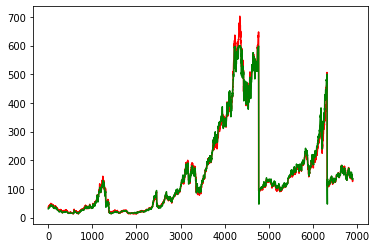

array([[ 30.698505],
       [ 30.978195],
       [ 31.641674],
       ...,
       [136.40173 ],
       [133.18477 ],
       [133.87535 ]], dtype=float32)

In [18]:
summarize_results(apple_model, apple_X, apple_y)

In [19]:
jpm_es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
jpm_model_history = jpm_model.fit(jpm_X, jpm_y, epochs=30, batch_size=32, callbacks=[jpm_es_callback], validation_data=(jpm_dev_X, jpm_dev_y))

Epoch 1/30
217/217 [==============================] - 7s 15ms/step - loss: 4013.4221 - val_loss: 105.8737
Epoch 2/30
217/217 [==============================] - 2s 11ms/step - loss: 1287.5431 - val_loss: 301.1909
Epoch 3/30
217/217 [==============================] - 2s 11ms/step - loss: 344.8899 - val_loss: 38.8106
Epoch 4/30
217/217 [==============================] - 2s 11ms/step - loss: 110.9521 - val_loss: 13.2598
Epoch 5/30
217/217 [==============================] - 2s 10ms/step - loss: 60.4701 - val_loss: 5.9473
Epoch 6/30
217/217 [==============================] - 2s 11ms/step - loss: 39.7687 - val_loss: 13.8734
Epoch 7/30
217/217 [==============================] - 3s 12ms/step - loss: 31.2304 - val_loss: 8.2118
Epoch 8/30
217/217 [==============================] - 2s 11ms/step - loss: 25.4851 - val_loss: 10.2181
Epoch 9/30
217/217 [==============================] - 2s 10ms/step - loss: 20.8014 - val_loss: 8.7538
Epoch 10/30
217/217 [==============================] - 2s 10ms/step 

217/217 [==============================] - 2s 5ms/step


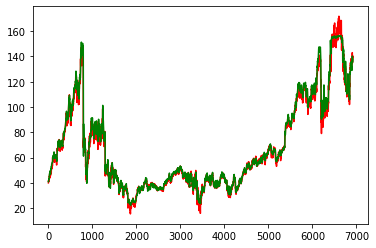

array([[ 40.912308],
       [ 40.922462],
       [ 41.16791 ],
       ...,
       [137.21632 ],
       [138.00189 ],
       [138.01988 ]], dtype=float32)

In [20]:
summarize_results(jpm_model, jpm_X, jpm_y)


In [21]:
xom_es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
xom_model_history = xom_model.fit(xom_X, xom_y, epochs=30, batch_size=32, callbacks=[xom_es_callback], validation_data=(xom_dev_X, xom_dev_y))

Epoch 1/30
217/217 [==============================] - 7s 15ms/step - loss: 3626.1008 - val_loss: 217.9608
Epoch 2/30
217/217 [==============================] - 2s 11ms/step - loss: 536.5755 - val_loss: 517.7962
Epoch 3/30
217/217 [==============================] - 2s 11ms/step - loss: 213.0379 - val_loss: 189.4112
Epoch 4/30
217/217 [==============================] - 2s 11ms/step - loss: 54.2261 - val_loss: 53.2065
Epoch 5/30
217/217 [==============================] - 2s 11ms/step - loss: 30.0737 - val_loss: 64.2831
Epoch 6/30
217/217 [==============================] - 2s 11ms/step - loss: 22.3565 - val_loss: 35.6475
Epoch 7/30
217/217 [==============================] - 2s 10ms/step - loss: 18.5547 - val_loss: 24.9007
Epoch 8/30
217/217 [==============================] - 2s 11ms/step - loss: 16.5054 - val_loss: 22.6663
Epoch 9/30
217/217 [==============================] - 2s 11ms/step - loss: 13.9914 - val_loss: 12.0791
Epoch 10/30
217/217 [==============================] - 2s 11ms/ste

217/217 [==============================] - 2s 4ms/step


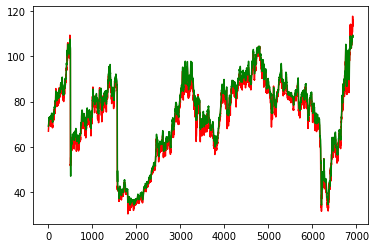

array([[ 69.12202],
       [ 69.13422],
       [ 69.17281],
       ...,
       [109.33579],
       [109.40058],
       [109.06732]], dtype=float32)

In [22]:
summarize_results(xom_model, xom_X, xom_y)

In [23]:
walmart_es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
walmart_model_history = walmart_model.fit(walmart_X, walmart_y, epochs=20, batch_size=32, callbacks=[walmart_es_callback], validation_data=(walmart_dev_X, walmart_dev_y))

Epoch 1/20
217/217 [==============================] - 7s 15ms/step - loss: 3902.9500 - val_loss: 148.3320
Epoch 2/20
217/217 [==============================] - 2s 11ms/step - loss: 1097.1217 - val_loss: 341.4785
Epoch 3/20
217/217 [==============================] - 2s 11ms/step - loss: 379.2748 - val_loss: 46.2751
Epoch 4/20
217/217 [==============================] - 2s 11ms/step - loss: 100.1784 - val_loss: 36.7001
Epoch 5/20
217/217 [==============================] - 2s 11ms/step - loss: 40.4815 - val_loss: 37.6253
Epoch 6/20
217/217 [==============================] - 2s 11ms/step - loss: 27.5713 - val_loss: 30.2990
Epoch 7/20
217/217 [==============================] - 2s 11ms/step - loss: 19.8902 - val_loss: 28.5903
Epoch 8/20
217/217 [==============================] - 3s 12ms/step - loss: 17.4556 - val_loss: 25.1978
Epoch 9/20
217/217 [==============================] - 5s 23ms/step - loss: 15.6767 - val_loss: 24.0050
Epoch 10/20
217/217 [==============================] - 5s 22ms/st

217/217 [==============================] - 2s 4ms/step


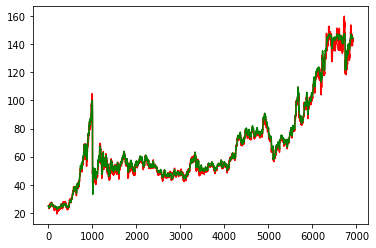

array([[ 24.715916],
       [ 24.636896],
       [ 24.69914 ],
       ...,
       [144.30399 ],
       [144.45168 ],
       [144.53735 ]], dtype=float32)

In [24]:
summarize_results(walmart_model, walmart_X, walmart_y)

<h1> Testing the Explainer </h1>
To evaluate whether our explainer works, we need these two criterias:

1. The prediction of the model has to be accurate

2. The surrogate model has to have a low MSE. 

In [25]:
from XAI.explainer import Explainer, flatten
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

In [26]:
def search(lst, labels, target_date):
  for index, item in enumerate(lst):
    if target_date == str(item.index[-1]):
      return item, labels[index]
  return None, None

In [65]:
def display_feature_importance(explainer, features):
  feature_importance = pd.DataFrame(explainer.surrogate_model.feature_importances_)
  cols = []
  for i in range(0, 7):
    for j in features:
      cols.append(j + "_" + str(i))
  feature_importance.index = cols
  feature_importance.columns = ['Feature Importance']
  return feature_importance.sort_values(by="Feature Importance", ascending=False).head(10)


In [67]:
def fit_explainer(model, X, y):
  predicted_val = model.predict(np.array(X).reshape(1, 7, 5))[0][0]
  print("Actual Value:", y)
  print("Predicted Value:", predicted_val)
  print("Difference:", y - predicted_val)
  print("")
  print("Explainer:")
  explainer = Explainer(model, np.array(X), surrogate_model=DecisionTreeRegressor(max_depth=5))
  explainer.generate_neigbouring_datapoints()
  explainer.explain(pipeline=[flatten])
  print("Feature Importance")
  print(display_feature_importance(explainer, columns[1:]).to_string())
  return explainer

<h3>Test 1</h3>
The Great Recession

In [116]:
s1 = '2008-09-22'
s1_apple, s1_apple_label = search(raw_apple_X, raw_apple_y, s1)
s1_jpm, s1_jpm_label = search(raw_jpm_X, raw_jpm_y, s1)
s1_xom, s1_xom_label = search(raw_xom_X, raw_xom_y, s1)
s1_walmart, s1_walmart_label = search(raw_walmart_X, raw_walmart_y, s1)


In [117]:
s1_apple_explainer = fit_explainer(apple_model, s1_apple, s1_apple_label)

1/1 [==============================] - 0s 42ms/step
Actual Value: 126.84
Predicted Value: 127.570015
Difference: -0.7300149536132778

Explainer:
3/3 [==============================] - 0s 4ms/step
The mean squared error is:  11.939661753467801
Feature Importance
                        Feature Importance
close_4                           0.334546
close_1                           0.239490
WTI Crude Oil Prices_4            0.198374
7-day EMA_4                       0.093594
WTI Crude Oil Prices_2            0.091917
WTI Crude Oil Prices_6            0.017939
close_3                           0.013596
close_0                           0.009931
close_2                           0.000578
WTI Crude Oil Prices_3            0.000035


In [118]:
s1_jpm_explainer = fit_explainer(jpm_model, s1_jpm, s1_jpm_label)

1/1 [==============================] - 0s 35ms/step
Actual Value: 40.56
Predicted Value: 42.31721
Difference: -1.7572111511230446

Explainer:
3/3 [==============================] - 0s 5ms/step
The mean squared error is:  0.5243084942925547
Feature Importance
             Feature Importance
close_4                0.367593
7-day EMA_4            0.322879
close_2                0.188548
7-day EMA_3            0.035350
close_5                0.033882
7-day EMA_1            0.023250
close_0                0.020604
7-day EMA_2            0.004240
close_6                0.003653
7-day EMA_5            0.000000


In [119]:
s1_xom_explainer = fit_explainer(xom_model, s1_xom, s1_xom_label)

1/1 [==============================] - 0s 30ms/step
Actual Value: 77.69
Predicted Value: 80.49743
Difference: -2.807428894042971

Explainer:
3/3 [==============================] - 0s 5ms/step
The mean squared error is:  0.3491640241519612
Feature Importance
                    Feature Importance
close_4                       0.653418
7-day EMA_1                   0.128366
close_1                       0.126760
close_6                       0.056354
7-day EMA_2                   0.010556
7-day EMA_6                   0.009362
7-day EMA_3                   0.006860
close_5                       0.006727
close_0                       0.001599
7-day volatility_1            0.000000


In [120]:
s1_walmart_explainer = fit_explainer(walmart_model, s1_walmart, s1_walmart_label)

1/1 [==============================] - 0s 39ms/step
Actual Value: 58.4
Predicted Value: 59.49335
Difference: -1.093350982666017

Explainer:
3/3 [==============================] - 0s 5ms/step
The mean squared error is:  0.10142756922989989
Feature Importance
                        Feature Importance
close_2                           0.666194
7-day EMA_0                       0.101235
7-day EMA_4                       0.088063
WTI Crude Oil Prices_5            0.057297
close_3                           0.056353
close_1                           0.017470
WTI Crude Oil Prices_3            0.006763
7-day EMA_2                       0.006132
7-day EMA_6                       0.000492
7-day EMA_1                       0.000000


<h2>Test 2</h2>
Outbreak of Gulf War 

In [132]:
s2_date = '1990-08-03'

s2_apple, s2_apple_label = search(raw_apple_X, raw_apple_y, s2_date)
s2_jpm, s2_jpm_label = search(raw_jpm_X, raw_jpm_y, s2_date)
s2_xom, s2_xom_label = search(raw_xom_X, raw_xom_y, s2_date)
s2_walmart, s2_walmart_label = search(raw_walmart_X, raw_walmart_y, s2_date)


In [133]:
s2_apple_explainer = fit_explainer(apple_model, s2_apple, s2_apple_label)

1/1 [==============================] - 0s 34ms/step
Actual Value: 39.5024
Predicted Value: 34.715256
Difference: 4.787144262695314

Explainer:
3/3 [==============================] - 0s 5ms/step
The mean squared error is:  1.2925157123252786
Feature Importance
                          Feature Importance
7-day EMA_4                         0.780305
7-day EMA_3                         0.146107
3 Month Treasury Yield_4            0.026109
3 Month Treasury Yield_0            0.024607
close_6                             0.016812
7-day EMA_2                         0.003018
3 Month Treasury Yield_6            0.002666
3 Month Treasury Yield_2            0.000376
close_0                             0.000000
WTI Crude Oil Prices_4              0.000000


In [134]:
s2_jpm_explainer = fit_explainer(jpm_model, s2_jpm, s2_jpm_label)

1/1 [==============================] - 0s 89ms/step
Actual Value: 21.375
Predicted Value: 23.885212
Difference: -2.510211944580078

Explainer:
3/3 [==============================] - 0s 4ms/step
The mean squared error is:  0.13264940616952595
Feature Importance
                          Feature Importance
7-day EMA_3                         0.681059
7-day EMA_6                         0.213641
7-day EMA_0                         0.068296
close_0                             0.027465
WTI Crude Oil Prices_1              0.009265
7-day EMA_1                         0.000169
7-day EMA_5                         0.000105
7-day volatility_0                  0.000000
3 Month Treasury Yield_4            0.000000
7-day volatility_6                  0.000000


In [135]:
s3_xom_explainer = fit_explainer(xom_model, s3_xom, s1_xom_label)

1/1 [==============================] - 0s 33ms/step
Actual Value: 77.69
Predicted Value: 36.20828
Difference: 41.48172134399414

Explainer:
3/3 [==============================] - 0s 6ms/step
The mean squared error is:  0.14252819044379364
Feature Importance
                          Feature Importance
7-day EMA_4                         0.825538
7-day EMA_3                         0.135468
7-day EMA_2                         0.016374
close_6                             0.008297
close_2                             0.006536
7-day EMA_0                         0.004276
close_3                             0.003511
3 Month Treasury Yield_6            0.000000
7-day EMA_5                         0.000000
7-day volatility_5                  0.000000


In [136]:
s3_walmart_explainer = fit_explainer(walmart_model, s3_walmart, s3_walmart_label)

1/1 [==============================] - 0s 25ms/step
Actual Value: 112.91
Predicted Value: 116.6259
Difference: -3.715900268554691

Explainer:
3/3 [==============================] - 0s 5ms/step
The mean squared error is:  0.36876534923495985
Feature Importance
                        Feature Importance
close_4                           0.653186
close_2                           0.101532
close_6                           0.097208
7-day EMA_1                       0.087434
WTI Crude Oil Prices_3            0.023901
7-day EMA_6                       0.017009
close_5                           0.013732
7-day EMA_0                       0.002979
WTI Crude Oil Prices_5            0.002170
close_3                           0.000848


<h3>Test 3</h3>
In Februay and March of 2020, the outbreak of pandemic sent the stock market in crash. During this time, the 3-month treasury yield fell drastically within a few days.

In [123]:
dates = [ '2020-03-02', '2020-03-25']
s3_walmart, s3_walmart_label = search(raw_walmart_X, raw_walmart_y, dates[0])
fit_explainer(walmart_model, s3_walmart, s3_walmart_label)

1/1 [==============================] - 0s 30ms/step
Actual Value: 112.91
Predicted Value: 116.6259
Difference: -3.715900268554691

Explainer:
3/3 [==============================] - 0s 5ms/step
The mean squared error is:  0.37416496256403253
Feature Importance
                        Feature Importance
close_4                           0.652868
close_1                           0.101680
close_3                           0.096996
7-day EMA_1                       0.087596
WTI Crude Oil Prices_3            0.024084
7-day EMA_6                       0.017090
close_2                           0.013702
7-day EMA_3                       0.002973
WTI Crude Oil Prices_5            0.002165
close_0                           0.000846


In [110]:
s3_walmart, s3_walmart_label = search(raw_walmart_X, raw_walmart_y, dates[1])
fit_explainer(walmart_model, s3_walmart, s3_walmart_label)

1/1 [==============================] - 0s 30ms/step
Actual Value: 112.91
Predicted Value: 116.6259
Difference: -3.715900268554691

Explainer:
3/3 [==============================] - 0s 4ms/step
The mean squared error is:  0.37797472014385664
Feature Importance
                        Feature Importance
close_4                           0.652718
close_2                           0.101750
close_3                           0.096895
7-day EMA_1                       0.087673
WTI Crude Oil Prices_3            0.024171
7-day EMA_6                       0.017128
close_5                           0.013688
7-day EMA_0                       0.002970
WTI Crude Oil Prices_5            0.002163
close_0                           0.000845


In [124]:
s3_xom, s3_xom_label = search(raw_xom_X, raw_xom_y, dates[0])
fit_explainer(xom_model, s3_xom, s3_xom_label)

1/1 [==============================] - 0s 31ms/step
Actual Value: 51.3
Predicted Value: 53.153645
Difference: -1.853644561767581

Explainer:
3/3 [==============================] - 0s 5ms/step
The mean squared error is:  0.5730450012427446
Feature Importance
                        Feature Importance
7-day EMA_5                       0.488526
close_1                           0.304085
close_4                           0.101893
7-day EMA_6                       0.061811
7-day volatility_4                0.029714
close_3                           0.006970
close_0                           0.004353
close_5                           0.002648
WTI Crude Oil Prices_1            0.000000
7-day volatility_1                0.000000


In [125]:
s3_xom, s3_xom_label = search(raw_xom_X, raw_xom_y, dates[1])
fit_explainer(xom_model, s3_xom, s3_xom_label)

1/1 [==============================] - 0s 46ms/step
Actual Value: 38.82
Predicted Value: 36.20828
Difference: 2.611721343994141

Explainer:
3/3 [==============================] - 0s 7ms/step
The mean squared error is:  0.15049391312927105
Feature Importance
                          Feature Importance
7-day EMA_4                         0.825422
7-day EMA_6                         0.094195
7-day EMA_3                         0.041255
7-day EMA_2                         0.016372
close_6                             0.008297
close_2                             0.006534
7-day volatility_2                  0.004415
close_3                             0.003510
7-day volatility_6                  0.000000
3 Month Treasury Yield_4            0.000000


<h2> Observations </h2>
- EMA and Closing usually dominate feature importance.

- Crude Oil will ocassionally show up in the explanations. 

- As expected, volatility plays no role in the explanations.

- Suprisingly, despite the strong negative correlation with treasury yields, that feature plays no role.

<h2>Conclusion</h2>
Results are inconclusive.

The good news:

- If the feature is obviously very important, the explainer would most likely be able to point that out. 

- If the feature carries no predictive power, the explainer would most likely correctly identify that and it will not show up in the explaination.

What remains to explored:

- If all features are of roughly equal importance, will the explainer work?
